In [ ]:
import pandas as pd
from rpy2.robjects import r, pandas2ri
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
robj = r.load('data/armdata.RData')
#%% get data

# eksperiment person repitition time dimension
pos_data = np.array(r['armdata'])
print(pos_data.shape)

# there's 12*3 missing datapoints
# it's all the first 1, 2, or 4 datapoints i a series in 6 of the trails
# nan_data = np.isnan(pos_data)
# nan_indexes = np.where(nan_data)

# pd.DataFrame(nan_indexes).to_csv('nan_indexes.csv')

# the nan values are replaced by copying the first non nan value in the 
# dataseries

pos_data[4,8,0,0,0:3] = pos_data[4,8,0,1,0:3]
pos_data[6,8,1,0,0:3] = pos_data[6,8,1,1,0:3]
pos_data[9,8,0,0:2,0:3] = pos_data[9,8,0,2,0:3]
pos_data[10,8,0,0:2,0:3] = pos_data[10,8,0,2,0:3]
pos_data[12,8,0,0:4,0:3] = pos_data[12,8,0,4,0:3]
pos_data[13,8,1,0:2,0:3] = pos_data[13,8,1,2,0:3]

# get velocity and acceleration data
vel_data = np.diff(pos_data, n=1, axis=3)
acc_data = np.diff(pos_data, n=2, axis=3)

# calculate mean trajectories
mean_pos = np.mean(pos_data, axis=(1,2))
mean_vel = np.mean(vel_data, axis=(1,2))
mean_acc = np.mean(acc_data, axis=(1,2))

# MES of test statistics
pos_test_stat = np.mean(np.array([(e1 - e2)**2 for e1, e2 in zip(pos_data, mean_pos)])**2, axis=3)
vel_test_stat = np.mean(np.array([(e1 - e2)**2 for e1, e2 in zip(vel_data, mean_vel)])**2, axis=3)
acc_test_stat = np.mean(np.array([(e1 - e2)**2 for e1, e2 in zip(acc_data, mean_acc)])**2, axis=3)

In [ ]:
exp_ = []
prs_ = []
rep_ = []
dim_ = []
data_ = []
for e in range(16):
    for p in range(10):
        for r_ in range(10):
            for d in range(3):
                exp_ += [e]
                prs_ += [p]
                rep_ += [r]
                dim_ += [d]
                data_ += [pos_data[e,p,r_,:,d]]


{'exp': exp_, 'prs': prs_, 'rep': rep_, 'dim': dim_, 'data': data_}

data_frame = pd.DataFrame(data = {'exp': exp_, 'prs': prs_, 'rep': rep_,
                                  'dim': dim_, 'data': data_})

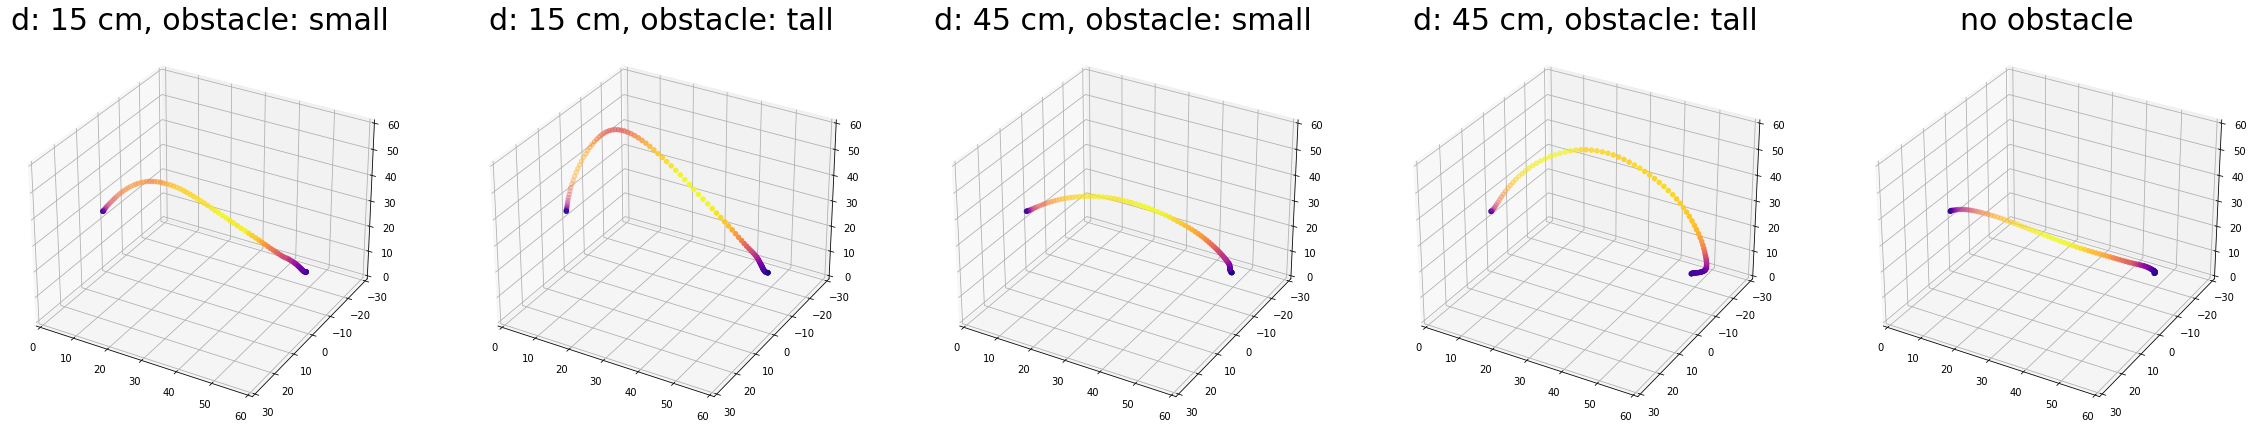

In [22]:
fig = plt.figure(figsize=(40, 40))

experiments = [0, 2, 12, 14, 15]
experiment_names = ["d: 15 cm, obstacle: small", "d: 15 cm, obstacle: tall", "d: 45 cm, obstacle: small", "d: 45 cm, obstacle: tall", "no obstacle"]
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, projection='3d')
    ax.set_xlim(0, 60)
    ax.set_ylim(30, -30)
    ax.set_zlim(0, 60)
    x = pos_data[experiments[i],1,0,:,0]
    y = pos_data[experiments[i],1,0,:,1]
    z = pos_data[experiments[i],1,0,:,2]
    velocities = np.vstack(([0,0,0], np.diff(pos_data[experiments[i],1,0,:,:], axis=0)))
    velocities = np.sqrt(velocities.dot(velocities.T).diagonal())
    ax.scatter3D(x, y, z, c = velocities, cmap = 'plasma')
    ax.set_title(experiment_names[i], fontsize = 30)
    ax.set_facecolor("white")

# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=-0.7, 
#                     hspace=0.4)
plt.show()

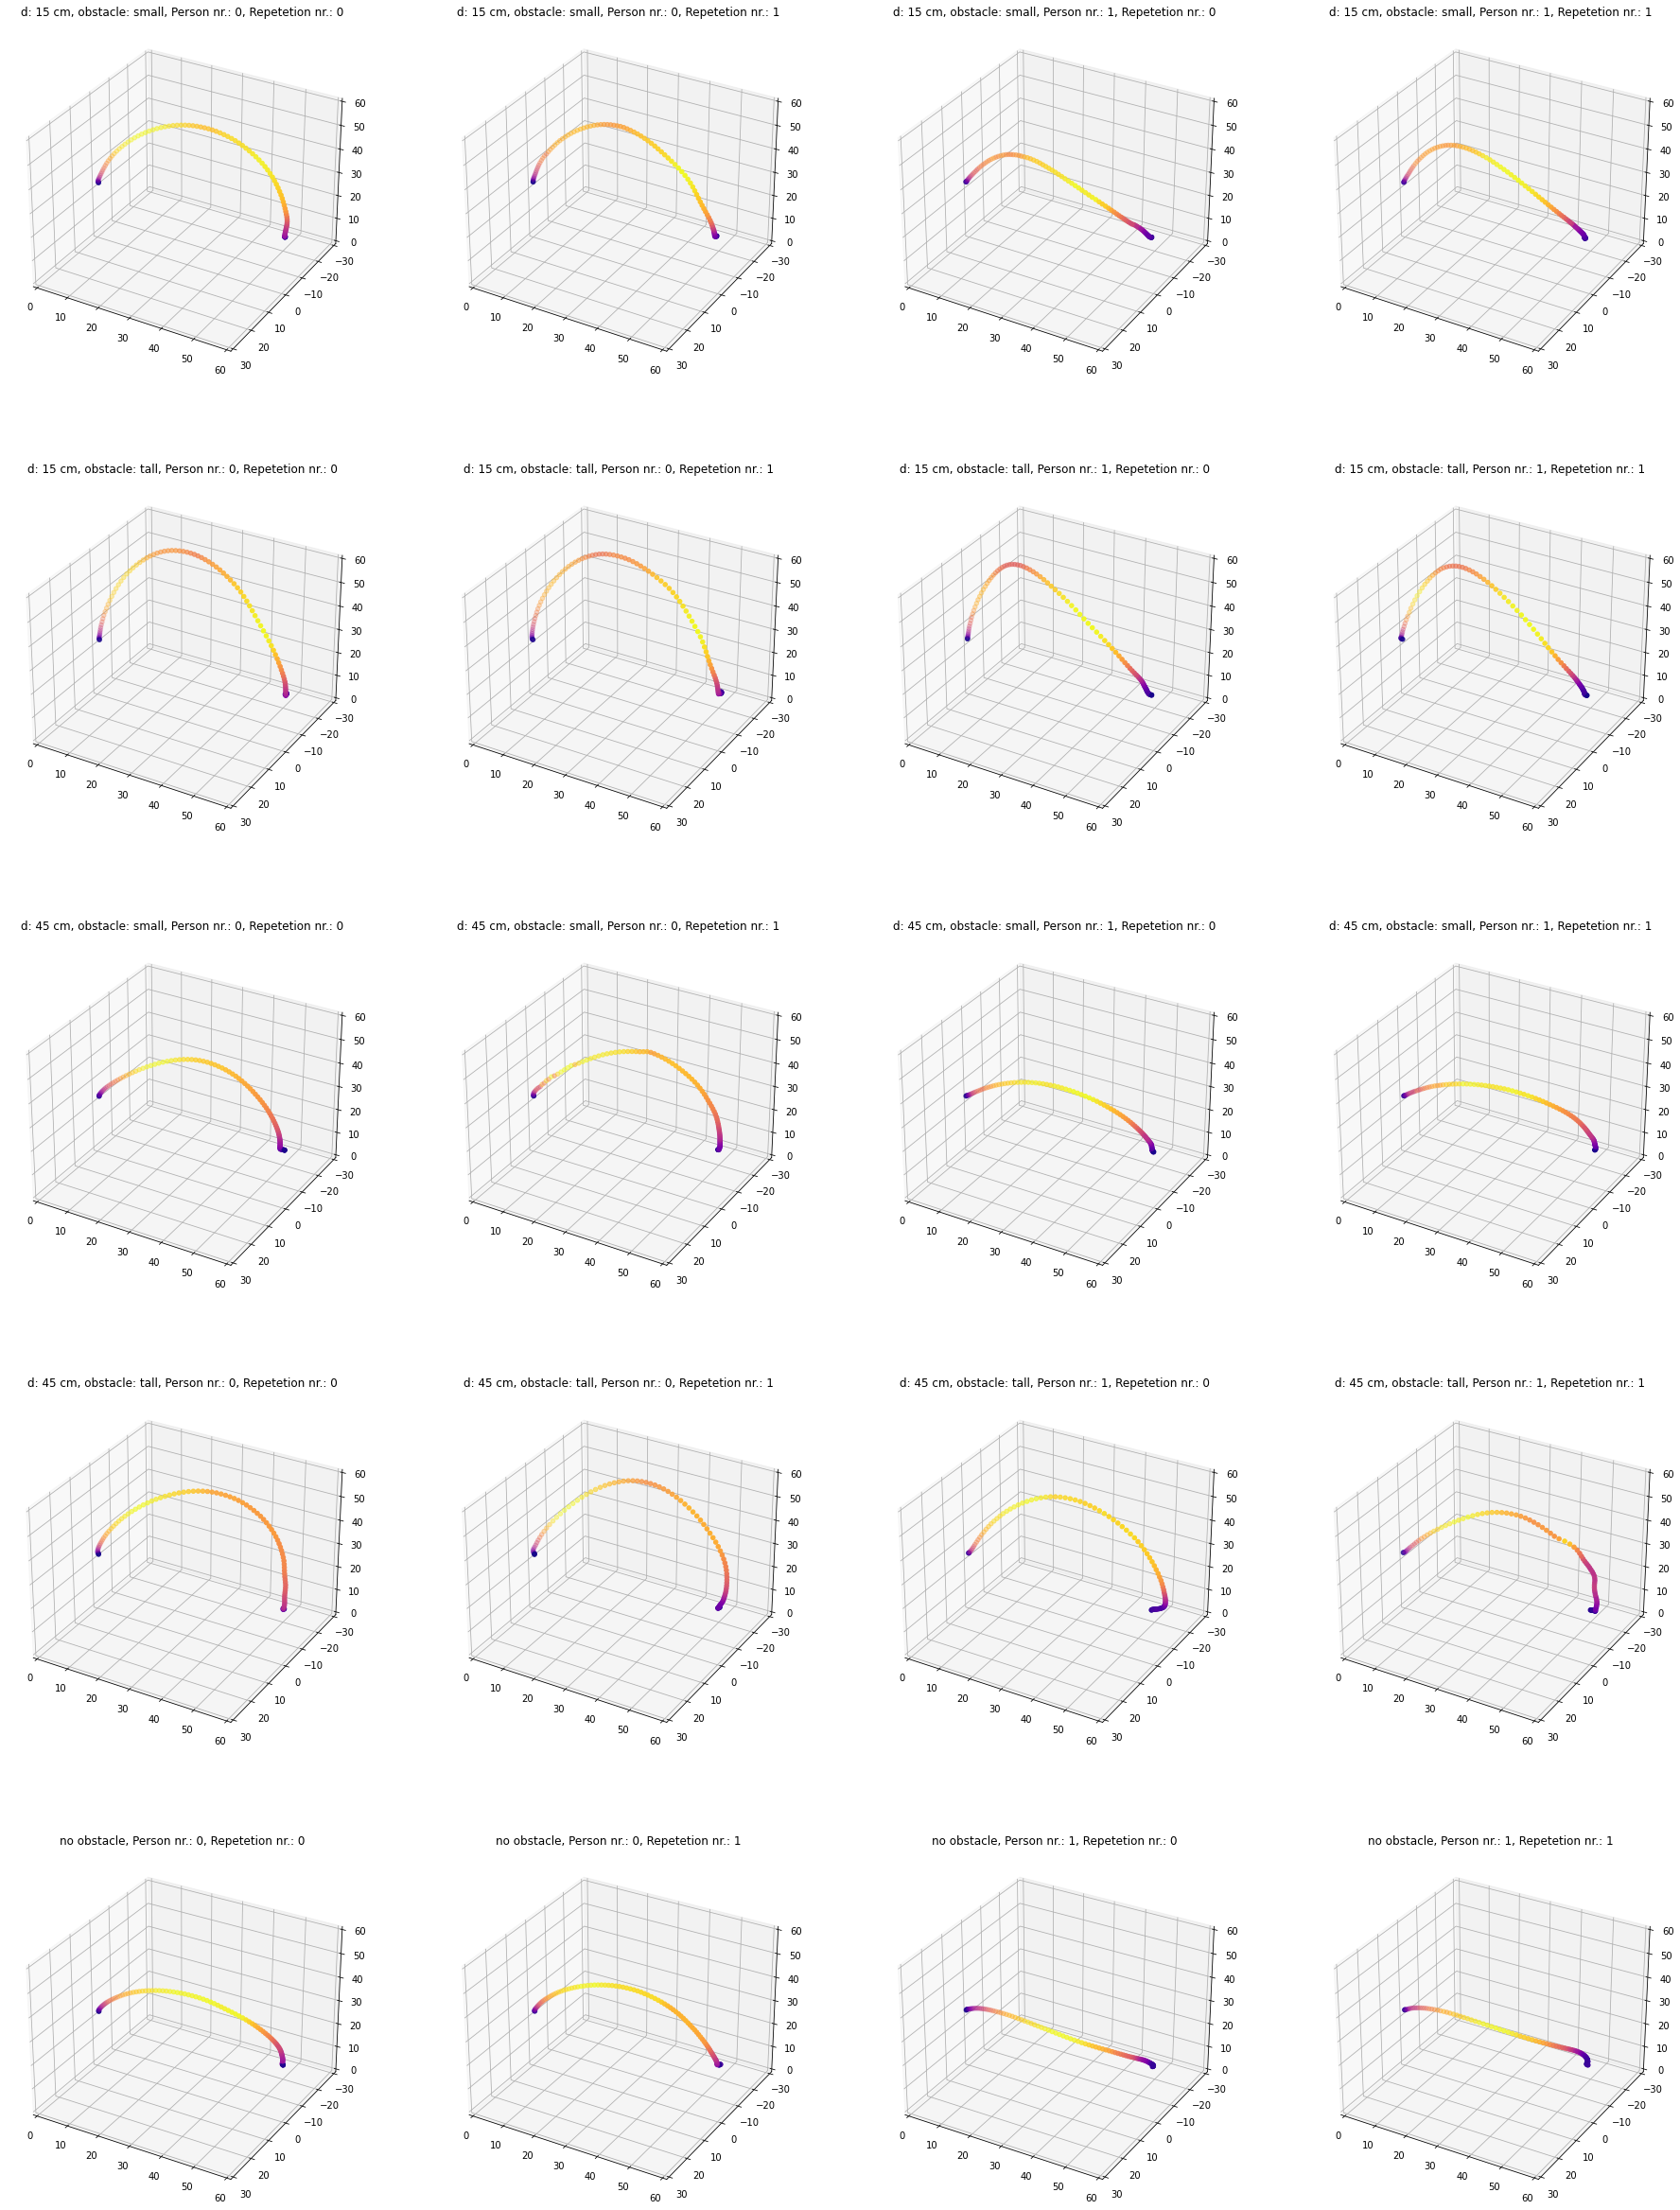

In [16]:
fig = plt.figure(figsize=(40, 40))

for i in range(5):
    for j in range(2):
        for k in range(2):
            ax = fig.add_subplot(5, 4, i * 4 + j * 2 + k + 1, projection='3d')
            ax.set_xlim(0, 60)
            ax.set_ylim(30, -30)
            ax.set_zlim(0, 60)
            experiments = [0, 2, 12, 14, 15]
            x = pos_data[experiments[i],j,k,:,0]
            y = pos_data[experiments[i],j,k,:,1]
            z = pos_data[experiments[i],j,k,:,2]
            velocities = np.vstack(([0,0,0], np.diff(pos_data[experiments[i],j,k,:,:], axis=0)))
            velocities = np.sqrt(velocities.dot(velocities.T).diagonal())
            ax.scatter3D(x, y, z, c = velocities, cmap = 'plasma')
            experiment_names = ["d: 15 cm, obstacle: small", "d: 15 cm, obstacle: tall", "d: 45 cm, obstacle: small", "d: 45 cm, obstacle: tall", "no obstacle"]
            ax.set_title(f"{experiment_names[i]}, Person nr.: {j}, Repetetion nr.: {k}")
            ax.set_facecolor("white")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=-0.5, 
                    hspace=0.3)
plt.show()